In [48]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [49]:
BATCH_SIZE = 32
CHANNELS=1
EPOCHS=10
LENGTH=431
BREATH=128

In [50]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SpectrogramImage",    
    seed=123,
    shuffle=True,
    image_size=(LENGTH,BREATH),
    batch_size=BATCH_SIZE,
    color_mode="grayscale"
)

Found 516 files belonging to 2 classes.


In [51]:
className=dataset.class_names

In [52]:
print(className)

['Anomaly', 'Normal']


In [53]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 431, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [54]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print("aaaa")
    print(labels_batch.numpy())

(32, 431, 128, 1)
aaaa
[1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0]


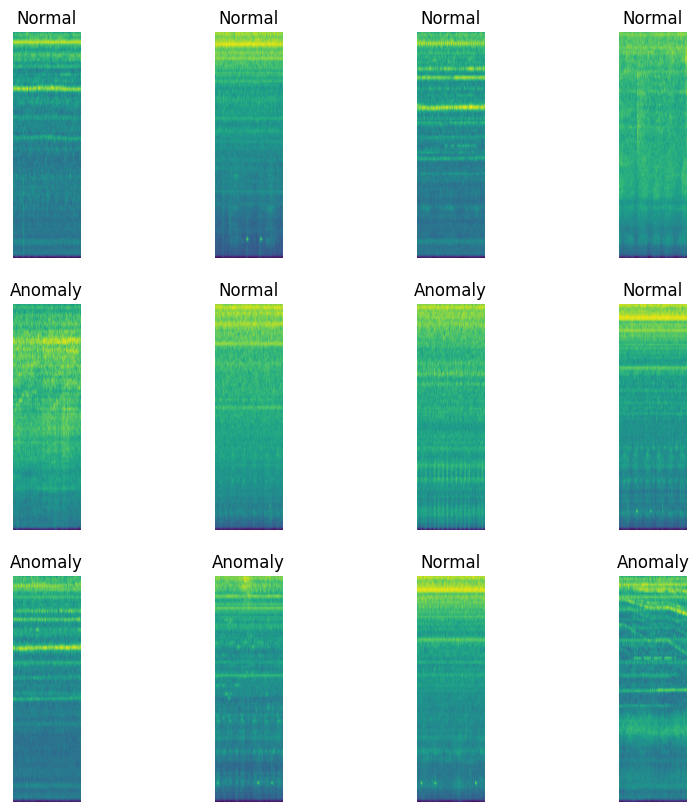

In [55]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4,  i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(className[labels_batch[i]])
        plt.axis("off")

In [56]:
len(dataset)

17

In [57]:
train_size=0.8
test_size=0.2
val_size=0.1

In [58]:
print("for train size:",int(len(dataset)*train_size))
print("for test size:",int(len(dataset)*test_size))
print("Validation Size:",int(len(dataset)*val_size))

for train size: 13
for test size: 3
Validation Size: 1


In [59]:
x_train=dataset.take(38)   #take is like x[0:54]
len(x_train)

17

In [60]:
x_test=dataset.skip(38)   #skip is like x[54:]
len(x_test)

0

In [61]:
val_ds=x_test.take(4)

In [62]:
x_test=x_test.skip(4)

In [63]:
print(len(x_test),len(val_ds))

0 0


In [64]:
x_train = x_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
x_test = x_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [65]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
    Resizing(LENGTH, BREATH),
    Rescaling(1./255),
])


In [66]:
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [67]:
input_shape = (LENGTH, BREATH, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [68]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [69]:
history = model.fit(
    x_train,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 521ms/step - accuracy: 0.6131 - loss: 0.6873
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 604ms/step - accuracy: 0.6081 - loss: 0.6746
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 618ms/step - accuracy: 0.5685 - loss: 0.6851
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 584ms/step - accuracy: 0.5702 - loss: 0.6841
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 600ms/step - accuracy: 0.5911 - loss: 0.6877
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 729ms/step - accuracy: 0.5764 - loss: 0.6822
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 739ms/step - accuracy: 0.6363 - loss: 0.6654
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 786ms/step - accuracy: 0.5833 - loss: 0.6804
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 667ms/step - accuracy: 0.5552 - loss: 0.6889
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 649ms/step - accuracy: 0.5621 - loss: 0.6896
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 651ms/step - accuracy: 0.5662 - loss: 0.6896
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 12

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(x_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.6010 - loss: 0.6747


In [ ]:
import numpy as np
for images_batch, labels_batch in x_test.take(1):
    
    first_image = images_batch[3].numpy().astype('uint8')
    first_label = labels_batch[3].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",className[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",className[np.argmax(batch_prediction[3])])